In [1]:
dataset = "data/Coco"
version = "2017"

In [2]:
import torch
import torch.utils.data as data
from python.data.dataset import *
from python.models.generator import UNet
from python.models.discriminator import PatchGAN
from python.utils.images import *
from python.train.trainer import *
from tqdm.notebook import tqdm
from python.eval.evaluation import Evalutation

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generator = UNet(1, 2).train()
generator.load_state_dict(torch.load("saves/cGan_100_R1/saved_models/generator_best_10", map_location=device))

<All keys matched successfully>

In [3]:
dataset_val= CocoLab(dataset, splits="test", version=version, size=256)
val_loader = data.DataLoader(dataset_val, batch_size=1, shuffle=True, num_workers=2)

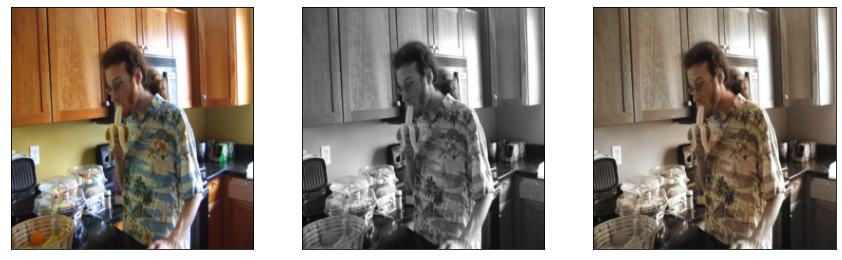

In [4]:
multi_plot(val_loader, generator, rows=1)

In [5]:
L, real_ab = next(iter(val_loader))
fake_ab = generator(L.to(device)).detach().to("cpu")
evaluation = Evalutation()
evaluation.eval(L, real_ab, fake_ab)

tensor([ 0.8987, 21.3552])

In [6]:
dataset_test= CocoLab(dataset, splits="test", version=version, size=256)
test_loader = data.DataLoader(dataset_test, batch_size=4, shuffle=True, num_workers=4)

In [10]:
evaluation = Evalutation()
evaluations = torch.zeros(len(test_loader), 2)
with torch.no_grad():
    for i, (L, ab) in enumerate(test_loader):
        print("\r", i, "/", len(test_loader), end="\r")
        fake_ab = generator(L.to(device))
        evaluations[i] = evaluation.eval(L, ab, fake_ab)